Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import recall_score,f1_score,roc_curve

from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")


Problem Statement

To predict a patient has diabetes or not using given parameters

In [3]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


EDA(Exploratory Data Analysis)

In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking For outliers

In [94]:
df["DiabetesPedigreeFunction"].value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: count, Length: 517, dtype: int64

<Axes: >

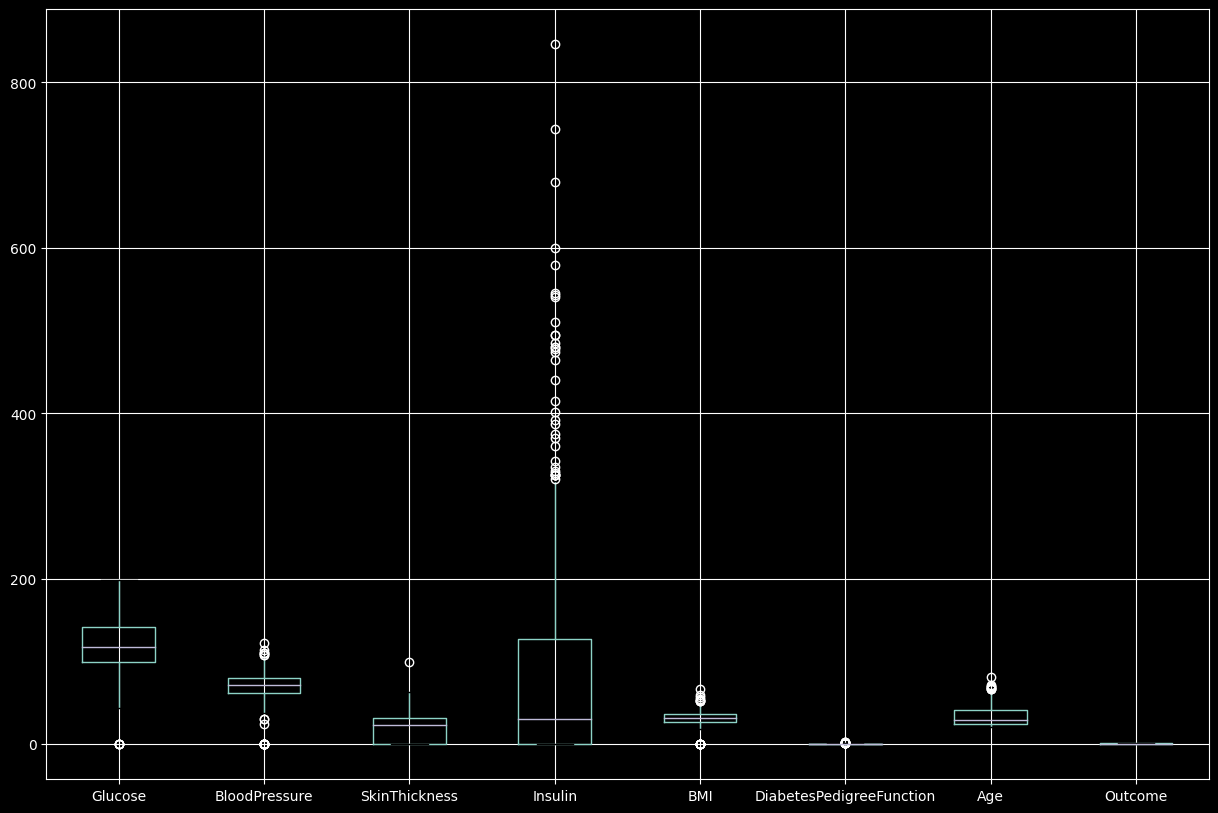

In [7]:
plt.figure(figsize=(15,10))
df.boxplot()

In [8]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Glucose', ylabel='Density'>

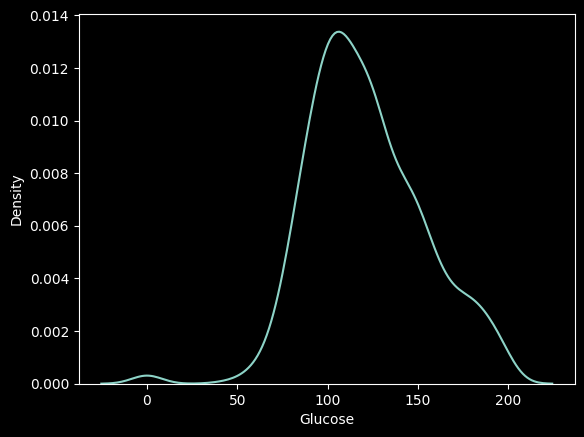

In [9]:
sns.kdeplot(df["Glucose"])

<Axes: xlabel='Glucose'>

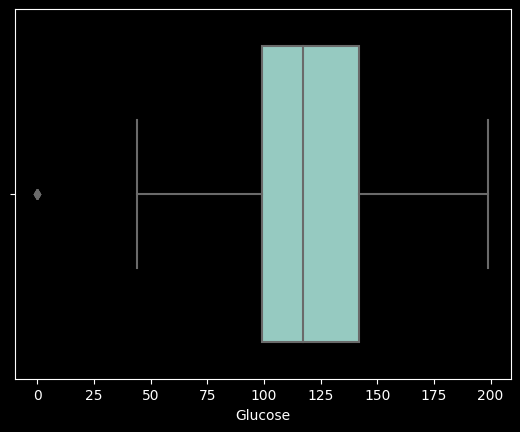

In [10]:
sns.boxplot(x=df["Glucose"])

In [11]:
q1=np.quantile(df["Glucose"],0.25)
q3=np.quantile(df["Glucose"],0.75)

iqr=q3-q1
print("Iqr is :",iqr)

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Iqr is : 43.0
Upper tail : 206.5
Lower tail : 34.5


In [12]:
np.where(df["Glucose"]>upper_tail)

(array([], dtype=int64),)

In [13]:
np.where(df["Glucose"]<lower_tail)

(array([ 75, 182, 342, 349, 502], dtype=int64),)

In [14]:
df.loc[df["Glucose"]<lower_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1


In [15]:
df["Glucose"]=np.where(df["Glucose"]<lower_tail,df["Glucose"].median(),df["Glucose"])
np.where(df["Glucose"]<lower_tail)

(array([], dtype=int64),)

In [16]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='BloodPressure', ylabel='Density'>

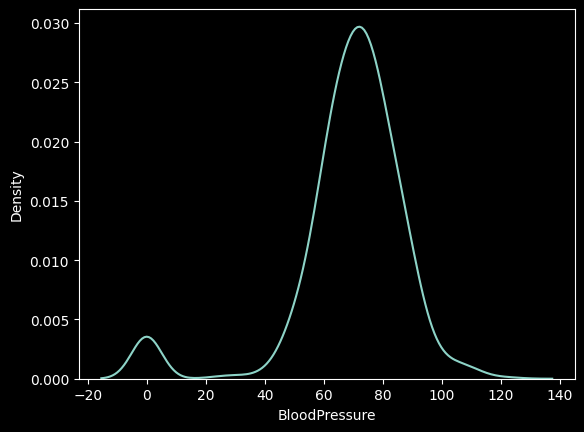

In [17]:
sns.kdeplot(df["BloodPressure"])

<Axes: xlabel='BloodPressure'>

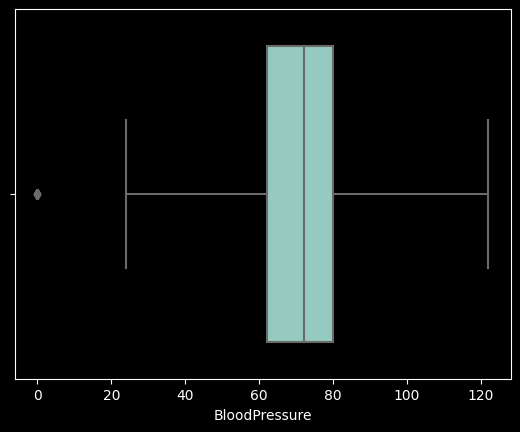

In [18]:
sns.boxplot(x=df["BloodPressure"],whis=3)

In [19]:
q1=np.quantile(df["BloodPressure"],0.25)
q3=np.quantile(df["BloodPressure"],0.75)

iqr=q3-q1
print("IQR :",iqr)

upper_tail=q3+3*iqr
lower_tail=q1-3*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

IQR : 18.0
Upper tail : 134.0
Lower tail : 8.0


In [20]:
df.loc[df["BloodPressure"]<lower_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,150.0,0,0,0,35.3,0.134,29,0
15,100.0,0,0,0,30.0,0.484,32,1
49,105.0,0,0,0,0.0,0.305,24,0
60,84.0,0,0,0,0.0,0.304,21,0
78,131.0,0,0,0,43.2,0.270,26,1
81,74.0,0,0,0,0.0,0.102,22,0
172,87.0,0,23,0,28.9,0.773,25,0
193,135.0,0,0,0,52.3,0.578,40,1
222,119.0,0,0,0,25.2,0.209,37,0
261,141.0,0,0,0,30.0,0.761,27,1


In [21]:
df["BloodPressure"]=np.where(df["BloodPressure"]<lower_tail,df["BloodPressure"].median(),df["BloodPressure"])
np.where(df["BloodPressure"]<lower_tail)

(array([], dtype=int64),)

In [22]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='SkinThickness', ylabel='Density'>

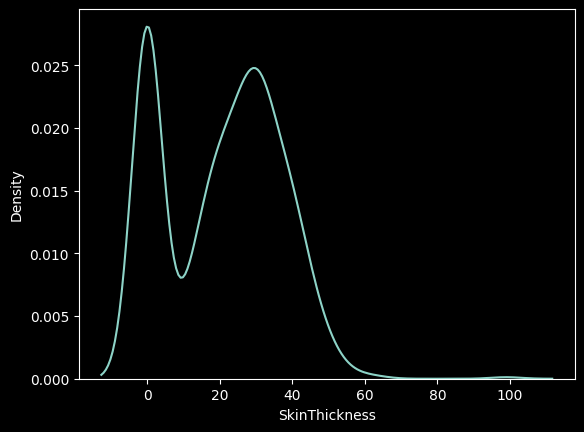

In [23]:
sns.kdeplot(df["SkinThickness"])

<Axes: xlabel='SkinThickness'>

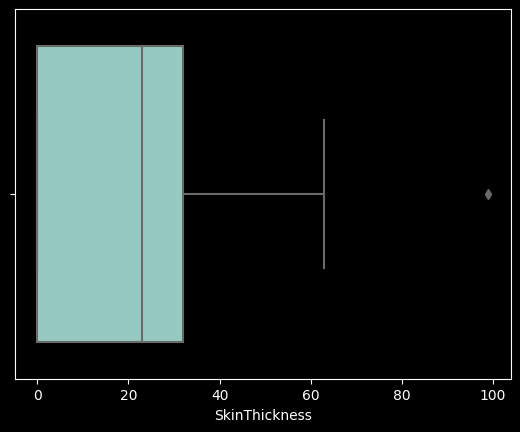

In [24]:
sns.boxplot(x=df["SkinThickness"])

<Axes: xlabel='SkinThickness'>

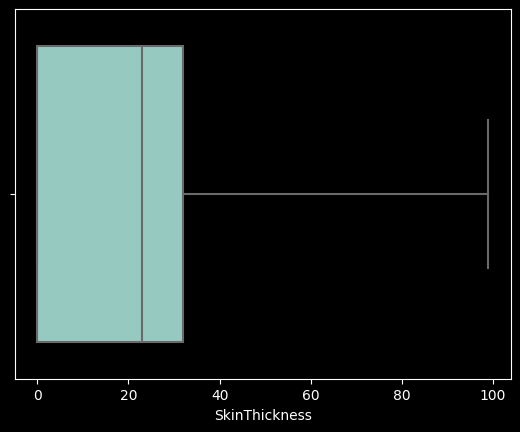

In [25]:
sns.boxplot(x=df["SkinThickness"],whis=3)

In [26]:
df.loc[df["SkinThickness"]==0]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,183.0,64.0,0,0,23.3,0.672,52,1
5,150.0,74.0,0,0,25.6,0.201,30,0
7,150.0,72.0,0,0,35.3,0.134,29,0
9,150.0,96.0,0,0,0.0,0.232,54,1
10,150.0,92.0,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...
757,123.0,72.0,0,0,36.3,0.258,52,1
758,106.0,76.0,0,0,37.5,0.197,26,0
759,190.0,92.0,0,0,35.5,0.278,66,1
762,89.0,62.0,0,0,22.5,0.142,33,0


In [27]:
df["SkinThickness"].median()

23.0

In [28]:
q1=np.quantile(df["SkinThickness"],0.25)
q3=np.quantile(df["SkinThickness"],0.75)

iqr=q3-q1
print("IQR : ",iqr)

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper tail : ",upper_tail)
print("lower tail : ",lower_tail)

IQR :  32.0
upper tail :  80.0
lower tail :  -48.0


In [29]:
df.loc[df["SkinThickness"]<lower_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [30]:
df["SkinThickness"].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64

In [31]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,50.0,35,0,33.6,0.627,50,1
1,85.0,66.0,29,0,26.6,0.351,31,0
2,183.0,64.0,0,0,23.3,0.672,52,1
3,150.0,66.0,23,94,28.1,0.167,21,0
4,150.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48,180,32.9,0.171,63,0
764,122.0,70.0,27,0,36.8,0.340,27,0
765,121.0,72.0,23,112,26.2,0.245,30,0
766,126.0,60.0,0,0,30.1,0.349,47,1


In [32]:
df["SkinThickness"]=np.where(df["SkinThickness"]==0,df["SkinThickness"].median(),df["SkinThickness"])


In [33]:
df["SkinThickness"].value_counts()

SkinThickness
23.0    249
32.0     31
30.0     27
27.0     23
28.0     20
33.0     20
18.0     20
31.0     19
19.0     18
39.0     18
29.0     17
25.0     16
37.0     16
40.0     16
22.0     16
26.0     16
35.0     15
41.0     15
36.0     14
15.0     14
17.0     14
20.0     13
24.0     12
42.0     11
13.0     11
21.0     10
46.0      8
34.0      8
12.0      7
38.0      7
45.0      6
16.0      6
43.0      6
11.0      6
14.0      6
44.0      5
10.0      5
47.0      4
48.0      4
50.0      3
49.0      3
54.0      2
7.0       2
52.0      2
8.0       2
56.0      1
51.0      1
60.0      1
63.0      1
99.0      1
Name: count, dtype: int64

<Axes: xlabel='SkinThickness'>

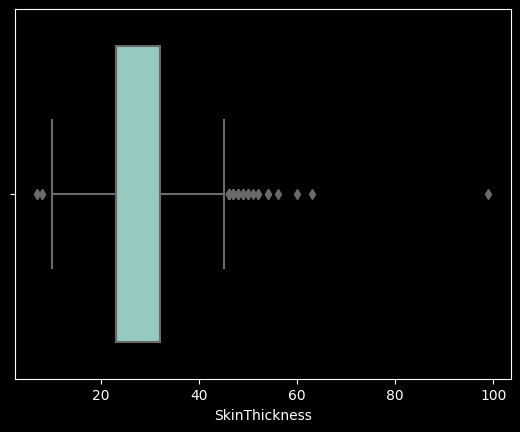

In [34]:
sns.boxplot(x=df["SkinThickness"])

<Axes: xlabel='SkinThickness'>

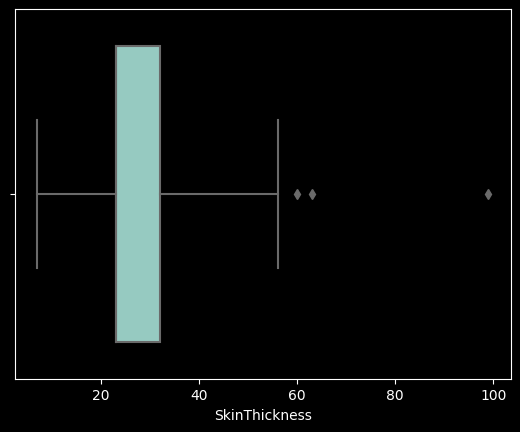

In [35]:
sns.boxplot(x=df["SkinThickness"],whis=3)

In [36]:
q1=np.quantile(df["SkinThickness"],0.25)
q3=np.quantile(df["SkinThickness"],0.75)

iqr=q3-q1
print("IQR : ",iqr)

upper_tail=q3+3*iqr
lower_tail=q1-3*iqr
print("upper tail : ",upper_tail)
print("lower tail : ",lower_tail)

IQR :  9.0
upper tail :  59.0
lower tail :  -4.0


In [37]:
df.loc[df["SkinThickness"]>upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,100.0,88.0,60.0,110,46.8,0.962,31,0
445,180.0,78.0,63.0,14,59.4,2.420,25,1
579,197.0,70.0,99.0,0,34.7,0.575,62,1


In [38]:
df["SkinThickness"]=np.where(df["SkinThickness"]>upper_tail,df["SkinThickness"].median(),df["SkinThickness"])
np.where(df["SkinThickness"]>upper_tail)

(array([], dtype=int64),)

<Axes: xlabel='SkinThickness', ylabel='Density'>

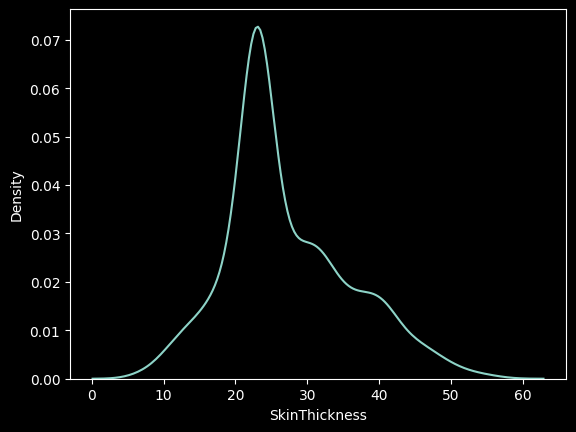

In [39]:
sns.kdeplot(df["SkinThickness"])

In [40]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Insulin', ylabel='Density'>

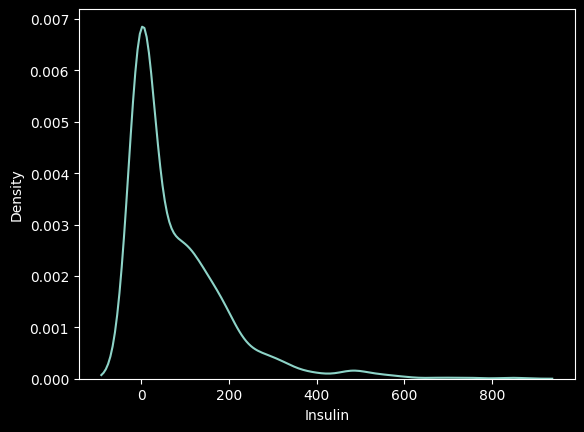

In [41]:
sns.kdeplot(df["Insulin"])

<Axes: xlabel='Insulin'>

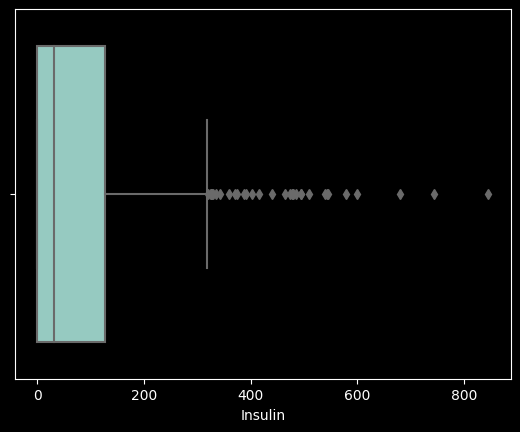

In [42]:
sns.boxplot(x=df["Insulin"])

<Axes: xlabel='Insulin'>

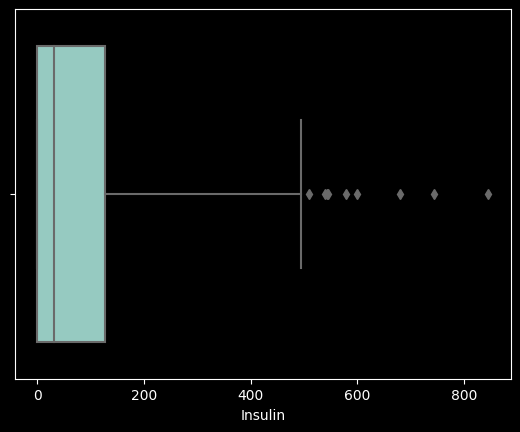

In [43]:
sns.boxplot(x=df["Insulin"],whis=3)

In [44]:
q1=np.quantile(df["Insulin"],0.25)
q3=np.quantile(df["Insulin"],0.75)

iqr=q3-q1
print("IQR : ",iqr)

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper tail : ",upper_tail)
print("lower tail : ",lower_tail)

IQR :  127.25
upper tail :  318.125
lower tail :  -190.875


In [45]:
df.loc[df["Insulin"]>upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,150.0,70.0,45.0,543,30.5,0.158,35,1
13,150.0,60.0,23.0,846,30.1,0.398,59,1
54,150.0,66.0,42.0,342,34.7,0.718,42,0
111,155.0,62.0,26.0,495,34.0,0.543,46,1
139,105.0,72.0,29.0,325,36.9,0.159,28,0
153,153.0,82.0,42.0,485,40.6,0.687,23,0
186,181.0,68.0,36.0,495,30.1,0.615,60,1
220,177.0,60.0,29.0,478,34.6,1.072,21,1
228,197.0,70.0,39.0,744,36.7,2.329,31,0
231,134.0,80.0,37.0,370,46.2,0.238,46,1


In [46]:
df["Insulin"].median()

30.5

In [47]:
df["Insulin"].mean()

79.79947916666667

In [48]:
df["Insulin"].mode()

0    0
Name: Insulin, dtype: int64

In [49]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,50.0,35.0,0,33.6,0.627,50,1
1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,183.0,64.0,23.0,0,23.3,0.672,52,1
3,150.0,66.0,23.0,94,28.1,0.167,21,0
4,150.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180,32.9,0.171,63,0
764,122.0,70.0,27.0,0,36.8,0.340,27,0
765,121.0,72.0,23.0,112,26.2,0.245,30,0
766,126.0,60.0,23.0,0,30.1,0.349,47,1


In [50]:
new_df=df.loc[df["Insulin"]<upper_tail]
new_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,50.0,35.0,0,33.6,0.627,50,1
1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,183.0,64.0,23.0,0,23.3,0.672,52,1
3,150.0,66.0,23.0,94,28.1,0.167,21,0
4,150.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180,32.9,0.171,63,0
764,122.0,70.0,27.0,0,36.8,0.340,27,0
765,121.0,72.0,23.0,112,26.2,0.245,30,0
766,126.0,60.0,23.0,0,30.1,0.349,47,1


In [51]:
new_df["Insulin"].mean()

62.328337874659404

In [52]:
q1=np.quantile(df["Insulin"],0.25)
q3=np.quantile(df["Insulin"],0.75)

iqr=q3-q1
print("IQR : ",iqr)

upper_tail=q3+3*iqr
lower_tail=q1-3*iqr
print("upper tail : ",upper_tail)
print("lower tail : ",lower_tail)

IQR :  127.25
upper tail :  509.0
lower tail :  -381.75


In [53]:
df["Insulin"]=np.where(df["Insulin"]>upper_tail,upper_tail,df["Insulin"])
np.where(df["Insulin"]>upper_tail)

(array([], dtype=int64),)

<Axes: xlabel='Insulin'>

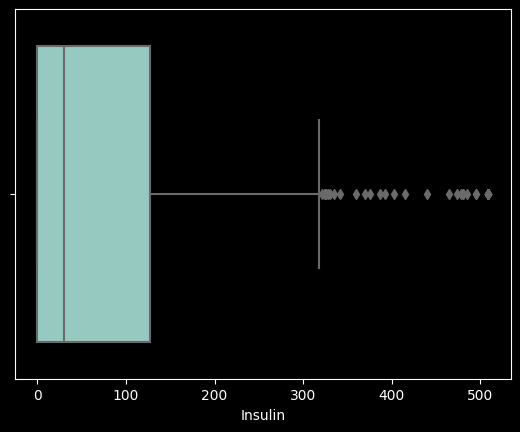

In [54]:
sns.boxplot(x=df["Insulin"])

<Axes: xlabel='Insulin'>

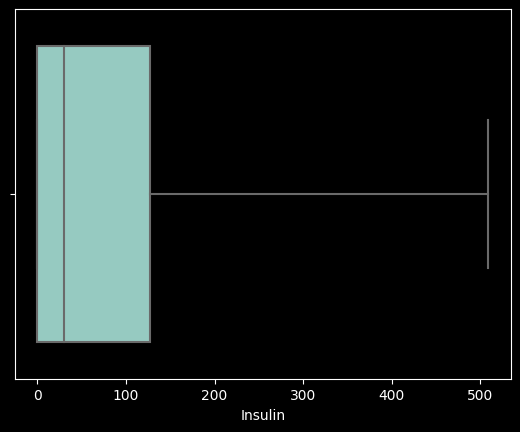

In [55]:
sns.boxplot(x=df["Insulin"],whis=3)

In [56]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='BMI', ylabel='Density'>

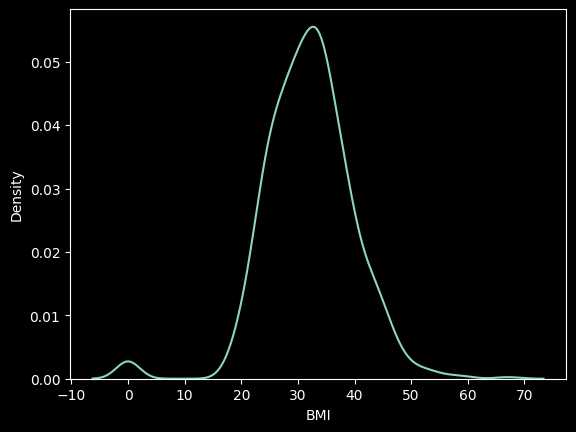

In [57]:
sns.kdeplot(df["BMI"])

<Axes: xlabel='BMI'>

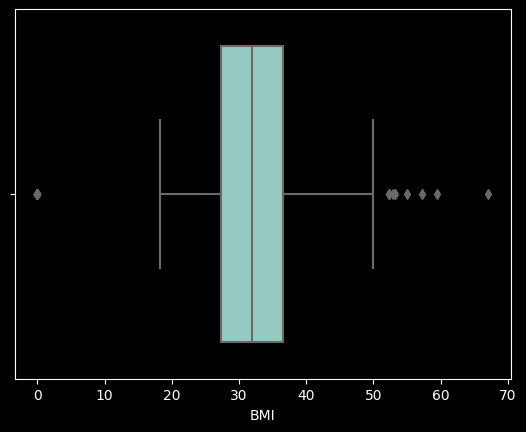

In [58]:
sns.boxplot(x=df["BMI"])

<Axes: xlabel='BMI'>

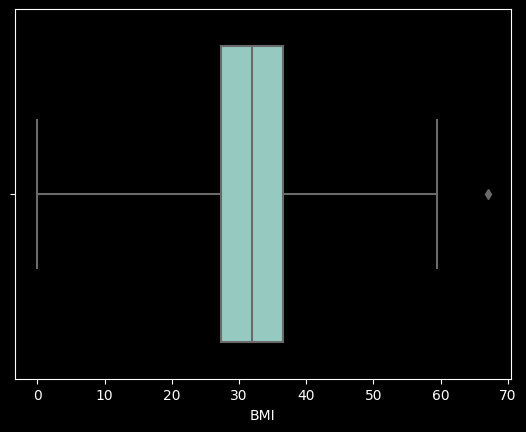

In [59]:
sns.boxplot(x=df["BMI"],whis=3)

In [60]:
q1=np.quantile(df["BMI"],0.25)
q3=np.quantile(df["BMI"],0.75)

iqr=q3-q1
print("IQR : ",iqr)

upper_tail=q3+3*iqr
lower_tail=q1-3*iqr
print("upper tail : ",upper_tail)
print("lower tail : ",lower_tail)

IQR :  9.3
upper tail :  64.5
lower tail :  -0.6000000000000014


In [61]:
df.loc[df["BMI"]>upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [62]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

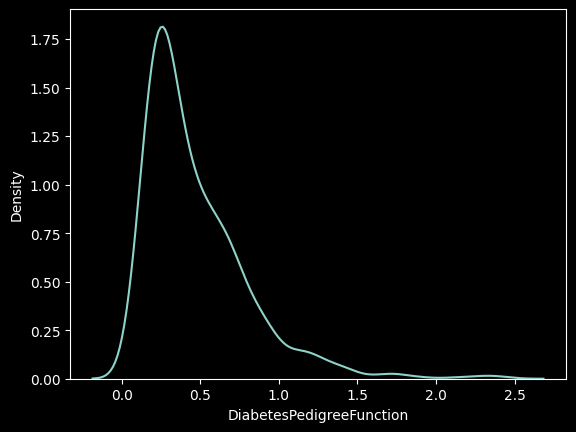

In [63]:
sns.kdeplot(df["DiabetesPedigreeFunction"])

<Axes: xlabel='DiabetesPedigreeFunction'>

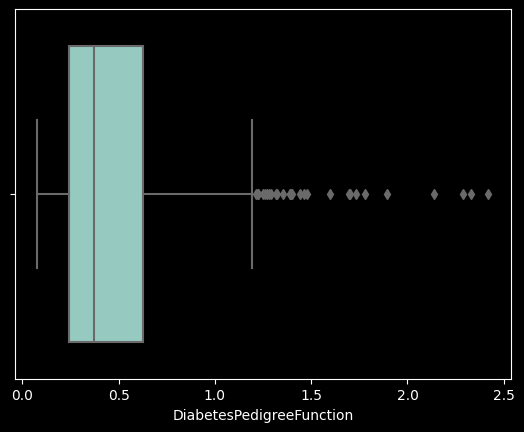

In [64]:
sns.boxplot(x=df["DiabetesPedigreeFunction"])

<Axes: xlabel='DiabetesPedigreeFunction'>

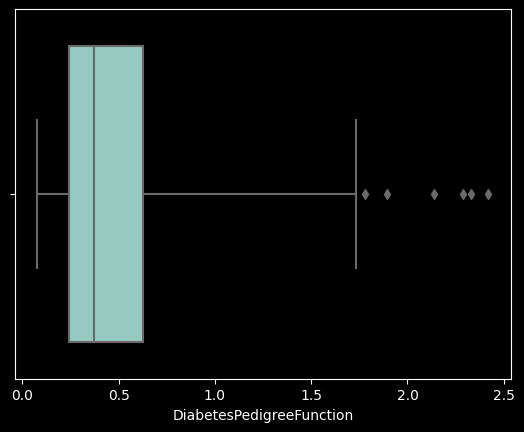

In [65]:
sns.boxplot(x=df["DiabetesPedigreeFunction"],whis=3)

In [66]:
q1=np.quantile(df["DiabetesPedigreeFunction"],0.25)
q3=np.quantile(df["DiabetesPedigreeFunction"],0.75)

iqr=q3-q1
print("IQR : ",iqr)

upper_tail=q3+3*iqr
lower_tail=q1-3*iqr
print("upper tail : ",upper_tail)
print("lower tail : ",lower_tail)

IQR :  0.38249999999999995
upper tail :  1.77375
lower tail :  -0.9037499999999999


In [67]:
df.loc[df["DiabetesPedigreeFunction"]>upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,150.0,40.0,35.0,168.0,43.1,2.288,33,1
45,180.0,66.0,39.0,0.0,42.0,1.893,25,1
58,146.0,82.0,23.0,0.0,40.5,1.781,44,0
228,197.0,70.0,39.0,509.0,36.7,2.329,31,0
370,173.0,82.0,48.0,465.0,38.4,2.137,25,1
445,180.0,78.0,23.0,14.0,59.4,2.420,25,1


In [68]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

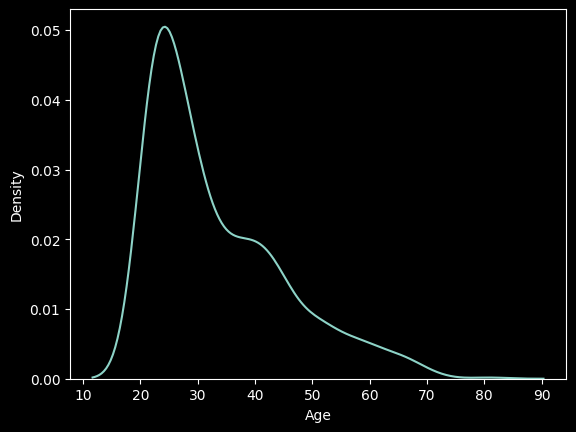

In [69]:
sns.kdeplot(df["Age"])

<Axes: xlabel='Age'>

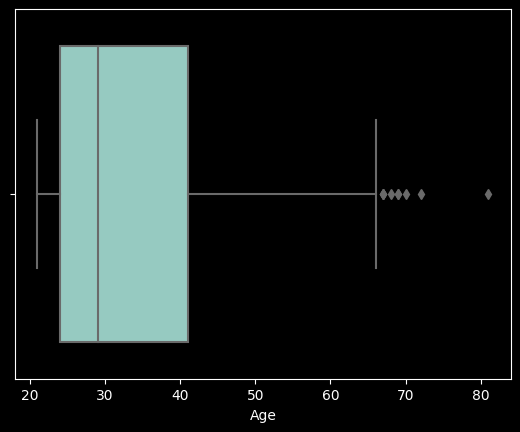

In [70]:
sns.boxplot(x=df["Age"])

<Axes: xlabel='Age'>

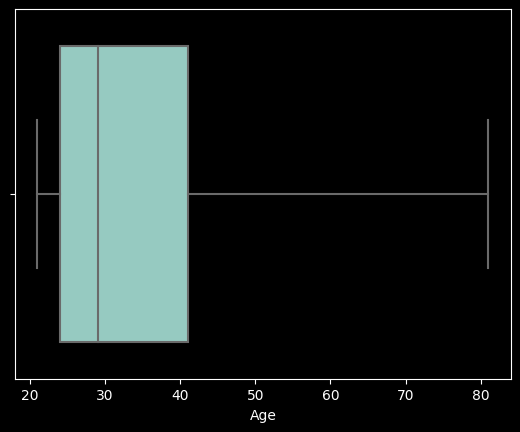

In [71]:
sns.boxplot(x=df["Age"],whis=3)

In [72]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Model Building

In [73]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=26,stratify=y)


Model Training

In [75]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Model Evaluation

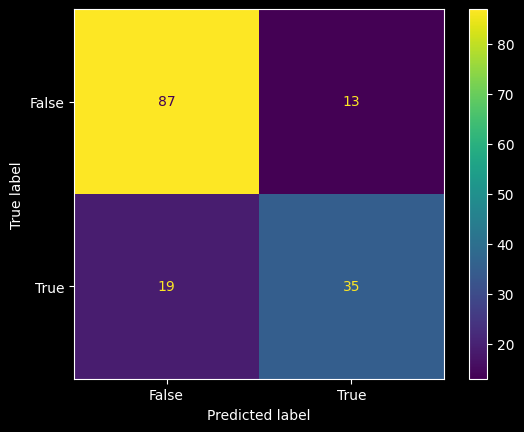

In [76]:
y_predict_testing=model.predict(x_test)

conf_marix=confusion_matrix(y_test, y_predict_testing)
cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_marix,display_labels=[False,True])
cm_display.plot()
plt.show()


In [77]:
accuracy = accuracy_score(y_test,y_predict_testing)
print("Accuracy score:",accuracy)

Accuracy score: 0.7922077922077922


In [78]:
clf_report=classification_report(y_test,y_predict_testing)
print("Classification report:\n",clf_report)

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       100
           1       0.73      0.65      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [79]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [80]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

Model Evaluation on Testing data 

In [81]:
y_predict_testing=model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_predict_testing)
print("Confusion Matrix:\n",conf_matrix)
print("*"*80)

accuracy=accuracy_score(y_test,y_predict_testing)
print("Accuracy score : ",accuracy)
print("*"*80)

clf_report=classification_report(y_test,y_predict_testing)
print("Classification Report:\n",clf_report)



Confusion Matrix:
 [[87 13]
 [19 35]]
********************************************************************************
Accuracy score :  0.7922077922077922
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       100
           1       0.73      0.65      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



MOdel Evaluation on Training Data

In [82]:
y_predict_training=model.predict(x_train)

conf_matrix=confusion_matrix(y_train,y_predict_training)
print("Confusion Matrix:\n",conf_matrix)
print("*"*80)

accuracy=accuracy_score(y_train,y_predict_training)
print("Accuracy Score: ",accuracy)
print("*"*80)

clf_report=classification_report(y_train,y_predict_training)
print("Classification Report:\n",clf_report)


Confusion Matrix:
 [[353  47]
 [ 91 123]]
********************************************************************************
Accuracy Score:  0.7752442996742671
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       400
           1       0.72      0.57      0.64       214

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [84]:
y_predict_probability=model.predict_proba(x_train)

In [85]:
fpr,tpr,thresh=roc_curve(y_train,y_predict_probability[:,1])

In [86]:
fpr

array([0.    , 0.    , 0.    , 0.0025, 0.0025, 0.005 , 0.005 , 0.0075,
       0.0075, 0.01  , 0.01  , 0.015 , 0.015 , 0.0175, 0.0175, 0.02  ,
       0.02  , 0.0225, 0.0225, 0.025 , 0.025 , 0.0275, 0.0275, 0.0325,
       0.0325, 0.035 , 0.035 , 0.0375, 0.0375, 0.04  , 0.04  , 0.045 ,
       0.045 , 0.0475, 0.0475, 0.0575, 0.0575, 0.06  , 0.06  , 0.0625,
       0.0625, 0.065 , 0.065 , 0.0675, 0.0675, 0.07  , 0.07  , 0.0725,
       0.0725, 0.075 , 0.075 , 0.0775, 0.0775, 0.08  , 0.08  , 0.0825,
       0.0825, 0.09  , 0.09  , 0.0925, 0.0925, 0.095 , 0.095 , 0.0975,
       0.0975, 0.1025, 0.1025, 0.105 , 0.105 , 0.11  , 0.11  , 0.1175,
       0.1175, 0.12  , 0.12  , 0.1225, 0.1225, 0.1275, 0.1275, 0.1325,
       0.1325, 0.135 , 0.135 , 0.1425, 0.1425, 0.1575, 0.1575, 0.1625,
       0.1625, 0.1675, 0.1675, 0.17  , 0.17  , 0.1725, 0.1725, 0.1775,
       0.1775, 0.1975, 0.1975, 0.2025, 0.2025, 0.205 , 0.205 , 0.2225,
       0.2225, 0.255 , 0.255 , 0.27  , 0.27  , 0.28  , 0.28  , 0.2825,
      

In [87]:
tpr

array([0.        , 0.0046729 , 0.00934579, 0.00934579, 0.08411215,
       0.08411215, 0.11682243, 0.11682243, 0.19626168, 0.19626168,
       0.20093458, 0.20093458, 0.20560748, 0.20560748, 0.22897196,
       0.22897196, 0.23364486, 0.23364486, 0.24766355, 0.24766355,
       0.28037383, 0.28037383, 0.28971963, 0.28971963, 0.30841121,
       0.30841121, 0.31308411, 0.31308411, 0.3317757 , 0.3317757 ,
       0.36448598, 0.36448598, 0.37850467, 0.37850467, 0.38785047,
       0.38785047, 0.39719626, 0.39719626, 0.40654206, 0.40654206,
       0.41121495, 0.41121495, 0.42523364, 0.42523364, 0.43457944,
       0.43457944, 0.43925234, 0.43925234, 0.44392523, 0.44392523,
       0.45327103, 0.45327103, 0.45794393, 0.45794393, 0.47663551,
       0.47663551, 0.48130841, 0.48130841, 0.4953271 , 0.4953271 ,
       0.5       , 0.5       , 0.50934579, 0.50934579, 0.52336449,
       0.52336449, 0.54205607, 0.54205607, 0.55140187, 0.55140187,
       0.57009346, 0.57009346, 0.57943925, 0.57943925, 0.58411

In [88]:
thresh

array([       inf, 0.99479963, 0.974387  , 0.97334243, 0.91170304,
       0.90886579, 0.88511792, 0.88040254, 0.8357436 , 0.83465575,
       0.83272443, 0.83005245, 0.82780519, 0.82485517, 0.81098095,
       0.80420556, 0.80368387, 0.8035087 , 0.7947569 , 0.79283673,
       0.78052741, 0.7790914 , 0.77224958, 0.76385403, 0.75585418,
       0.74763043, 0.73798352, 0.72756212, 0.72103487, 0.7103164 ,
       0.68443637, 0.68251483, 0.67835649, 0.67428592, 0.67278157,
       0.65987059, 0.65376411, 0.65016998, 0.64558125, 0.64524993,
       0.64468396, 0.6418789 , 0.63804304, 0.63564319, 0.63283455,
       0.62871661, 0.62774315, 0.62644145, 0.62269546, 0.61942305,
       0.61489097, 0.61470988, 0.60356307, 0.59993555, 0.59317105,
       0.59282647, 0.58781252, 0.58305484, 0.57298016, 0.57215215,
       0.57071094, 0.56721756, 0.5553981 , 0.55439959, 0.54614617,
       0.54574576, 0.53898746, 0.53234253, 0.52969925, 0.52406656,
       0.51487827, 0.50833605, 0.49812272, 0.49013879, 0.48752

Text(0.5, 1.0, 'Reciever Operating characteristics curve')

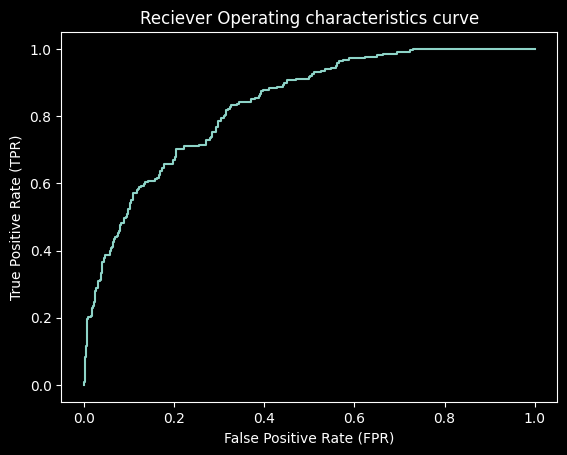

In [89]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Reciever Operating characteristics curve")

In [90]:
import pickle

In [93]:
with open("Diabetes_model.pkl","wb") as f:
    pickle.dump(model,f)